#### Directory

In [3]:
# For reset
from os import listdir
from os.path import isfile, join
import os

def reset_detect():
    mypath = ['detect/detect_face/','detect/detect_non_face/']
    for i in mypath:
        penghapusan = [f for f in listdir(i) if isfile(join(i, f))]
        penghapusan = [i + p for p in penghapusan]
        for j in penghapusan:
            os.remove(j)

In [4]:
reset_detect()

In [6]:
from os import listdir
from os.path import isfile, join
import base64
mypath = 'data_test/'
list_data_eval = [f for f in listdir(mypath) if isfile(join(mypath, f))]
list_data_eval = [mypath + i for i in list_data_eval]

#### Predict and Eval

##### Using Function & API comparison

In [7]:
import model.face_det_yv8 as face_det_yv8
from tqdm import tqdm 

list_prediction_result = []
for each_path in tqdm(list_data_eval):
    result = face_det_yv8.predict_face_local_path(each_path)
    data = result
    data['path'] = each_path
    list_prediction_result.append(data) #11-12FPS

Ultralytics YOLOv8.0.20  Python-3.9.0 torch-1.13.1+cpu CPU
Setup complete  (8 CPUs, 15.7 GB RAM, 133.6/145.4 GB disk)
  0%|          | 0/19 [00:00<?, ?it/s]Ultralytics YOLOv8.0.20  Python-3.9.0 torch-1.13.1+cpu CPU
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
100%|██████████| 19/19 [00:02<00:00,  7.67it/s]


In [5]:
# import requests 
# list_prediction_result = []
# for each_path in tqdm(list_data_eval):
#     payload = {
#         'path' : each_path
#     }

#     data = requests.post('http://127.0.0.1:8002/face_det_path', json=payload)
#     data = data.json()['data']
#     data['path'] = each_path
#     list_prediction_result.append(data) #9-10FPS

In [8]:
import pandas as pd 

df_prediction_result = pd.DataFrame(list_prediction_result)
df_prediction_result

,confidence,result,bboxes,path
0,"[0.9174492359161377, 0.8974155783653259, 0.888...",True,"[[736.0, 561.0, 943.0, 874.0], [1030.0, 296.0,...",data_test/4jAWtqUCUWKk2bBkmKfiRS.jpg
1,[0.9692655801773071],True,"[[376.0, 12.0, 603.0, 346.0]]",data_test/79368-profil-stacey-ryan-instagramat...
2,[0.952233076095581],True,"[[527.0, 94.0, 849.0, 512.0]]",data_test/aaaaa.jpg
3,"[0.881206750869751, 0.8696033954620361, 0.7458...",True,"[[215.0, 143.0, 311.0, 281.0], [606.0, 96.0, 6...",data_test/aaaaaa.jpg
4,"[0.891414225101471, 0.7933381199836731]",True,"[[314.0, 185.0, 356.0, 233.0], [523.0, 38.0, 5...",data_test/aaaaaaa.jpg
5,[0.9604229927062988],True,"[[140.0, 50.0, 210.0, 146.0]]",data_test/aaaaaaaaaaaa.jpg
6,[0.9714223742485046],True,"[[152.0, 271.0, 417.0, 660.0]]",data_test/aaaaaaabbb.jpg
7,"[0.9261573553085327, 0.8755702972412109, 0.864...",True,"[[125.0, 65.0, 229.0, 231.0], [397.0, 52.0, 48...",data_test/abbbcc.jpg
8,"[0.8732789158821106, 0.8070346713066101]",True,"[[244.0, 85.0, 350.0, 223.0], [472.0, 65.0, 57...",data_test/bbbbbb.jpg
9,[0.8042011857032776],True,"[[51.0, 48.0, 167.0, 219.0]]",data_test/download.jpeg


In [9]:
# Save detection result to a directory
import cv2 
import numpy as np
import os 

try:
    os.mkdir('detect/detect_face/')
    os.mkdir('detect/detect_non_face/')
except:
    pass

list_of_predicted_image = []
for _, each_result in tqdm(df_prediction_result.iterrows(), total=len(df_prediction_result)):
    # img = cv2.cvtColor(np.array(orgimg), cv2.COLOR_RGB2BGR)
    img = cv2.imread(each_result['path'])
    for each_box, each_conf in zip(each_result['bboxes'], each_result['confidence']):
        x1,y1,x2,y2 = each_box
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (105,255,0), 2)
        cv2.putText(img,f"Face: {round(each_conf* 100,2)}%",(int(x1), int(y1) - 10),fontFace = cv2.FONT_HERSHEY_SIMPLEX,fontScale = 0.6,color = (105,255,0),thickness=2)
    if each_result['result']:
        cv2.imwrite(f"detect/detect_face/{each_result.path.split('/')[-1]}",img)
    else:
        cv2.imwrite(f"detect/detect_non_face/{each_result.path.split('/')[-1]}",img)
    list_of_predicted_image.append(img)

100%|██████████| 19/19 [00:00<00:00, 64.06it/s]


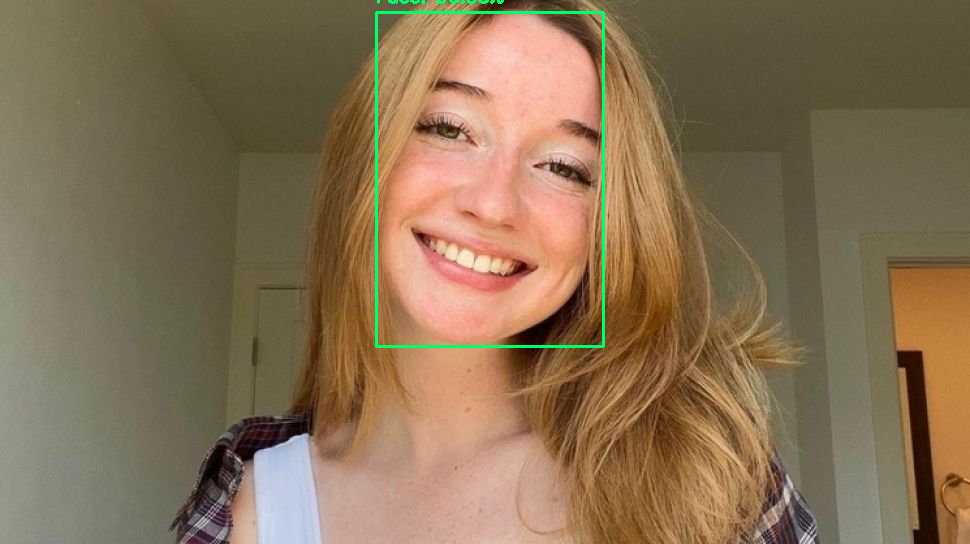

In [19]:
# Display Image Result immediately
from PIL import Image

img_test = list_of_predicted_image[1]
img_test = img_test.reshape((img_test.shape[0], img_test.shape[1], 3))
img_test = img_test[..., ::-1]
Image.fromarray(img_test)

##### Using base64

In [11]:
def convert_image_b64str(path):
    with open(path, "rb") as img_file:
        img_b64 = base64.b64encode(img_file.read())
    img_str = img_b64.decode('ascii')
    return img_str

In [13]:
b64 = convert_image_b64str(list_data_eval[1])

In [18]:
import requests

payload = {
    'b64str' : b64
}

data = requests.post('http://10.25.11.175:8002/face_det_b64', json=payload)
data = data.json()

In [16]:
result = face_det_yv8.predict_face_b64(b64)
result

{'b64_pred': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAIgA8oDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDKk/cxpCaP9bTB/BR5X/fVfnZ7hDJN+7fP36rSedFcedVn6/8AbKoZP+Wn40AVpIfN/wBdTJIf9J86Xy6fL/rahfr+FAC/8u1UriKrv/LOqV5L5UnX5KAK1x+66VQvJf3mP+elXLjMsf7qq0vegCtcf0qGTz

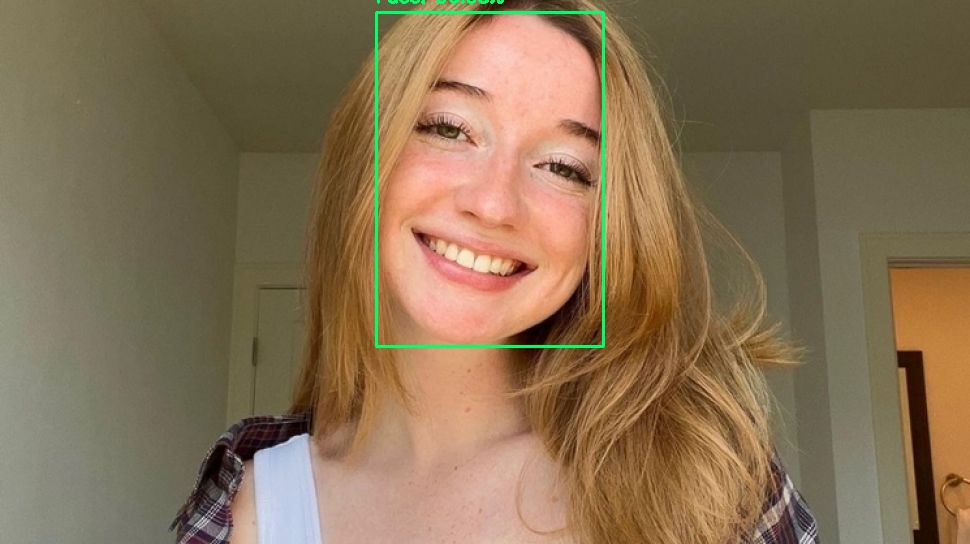

In [17]:
from io import BytesIO
orgimg = Image.open(BytesIO(base64.b64decode(result['b64_pred'])))
orgimg